In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import seaborn as sns
import utils
from sklearn.decomposition import PCA

In [2]:
df = utils.read_toy_data()
df.head()

,x,y,class
0,-1.959897,0.498693,Case
1,-3.346470,-1.843321,Case
2,-2.916821,-0.392444,Case
3,-3.798834,-1.905248,Case
4,-0.466026,0.972492,Case


In [3]:
# Get projection vector from PCA
pca = PCA(n_components=1)
pca.fit(df[['x','y']])
z = pca.components_.T
df['PCA'] = utils.project_along_vector(df[['x', 'y']].T, z).T

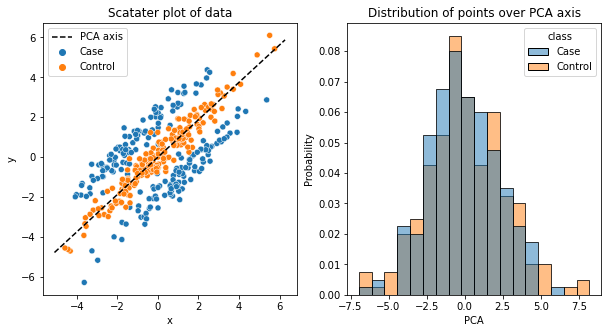

In [15]:
fig, axs = plt.subplots(1,2)
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = axs[0])
utils.plot_line(z, np.array([0,0]), axs[0] ,plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'PCA axis'})
axs[0].legend()
sns.histplot(data = df, x = 'PCA', hue = 'class', ax= axs[1], stat = 'probability')
axs[0].set_title("Scatater plot of data")
axs[1].set_title("Distribution of points over PCA axis")
fig.set_size_inches(10,5)
fig.savefig('../media/pca_projection.jpg')